Importing Library 

In [14]:
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
import datetime

Datasets

In [15]:
data = pd.read_csv('datasets/MNIST_datasets/data/train.csv')

In [16]:
data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Random Sample from the dataset

In [17]:
data.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
18212,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Plotting Digit from above sample 

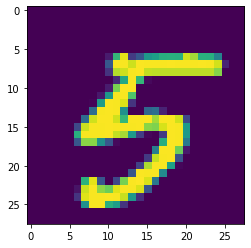

In [18]:
plt.imshow(data.iloc[18212,1:].values.reshape(28,28))

Splitting dataset 

In [19]:
X = data.iloc[:,1:]
y = data.iloc[:,:1]
X_train ,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.3 , random_state = 56) 
X_train.shape
y_train.shape

(29400, 1)

Training Model

In [20]:
s = datetime.datetime.now()
knn = KNN()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
e = datetime.datetime.now()
print("Accuracy--" , accuracy_score(y_test, y_pred))
print("Total time--" , e - s ) 


C:\Users\Levi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy-- 0.9628571428571429
Total time-- 0:00:21.796028


Test Dataset

In [21]:
test_data = pd.read_csv('datasets/MNIST_datasets/data/test.csv')
test_data.shape

(28000, 784)

Random Sample

In [22]:
sample1 = test_data.sample()
sample1

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
4873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


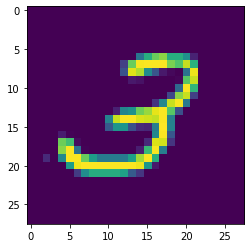

In [23]:
plt.imshow(sample1.values.reshape(28,28))

Predicting Above digit

In [24]:
knn.predict(sample1.values)

C:\Users\Levi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int64)

PCA(Princple component Analysis)

In [25]:
data1 = data
X1 = data.iloc[:,1:]
y1= data.iloc[:,:1]
X_train1,X_test1 ,y_train1,y_test1 = train_test_split(X1 ,y1 , random_state = 56, test_size = 0.3 )
sample , dimension = X1.shape
print("Dimension" , dimension)

Dimension 784


Original dimension of digits are 784, reducing to 300 with PCA

In [26]:
pca = PCA(n_components = 300)
reduced_train_data  = pca.fit_transform(X_train1)
reduced_test_data = pca.transform(X_test1)
reduced_sample , reduced_dimension = reduced_train_data.shape
print("Reduced Dimension" , reduced_dimension)

Reduced Dimension 300


In [27]:
s = datetime.datetime.now()
knn1 = KNN()
knn1.fit(reduced_train_data,y_train1)
y_pred = knn1.predict(reduced_test_data)
e = datetime.datetime.now()
print("Accuracy After Performing PCA" , accuracy_score(y_pred, y_test1))
print("Total Time Taken " , e - s )

C:\Users\Levi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy After Performing PCA 0.9626984126984127
Total Time Taken  0:00:13.441123


PCA with 2 components

In [28]:
pca = PCA(n_components = 2 )
data =  pca.fit_transform(X_train)

Plotting digits in 2 Dimension

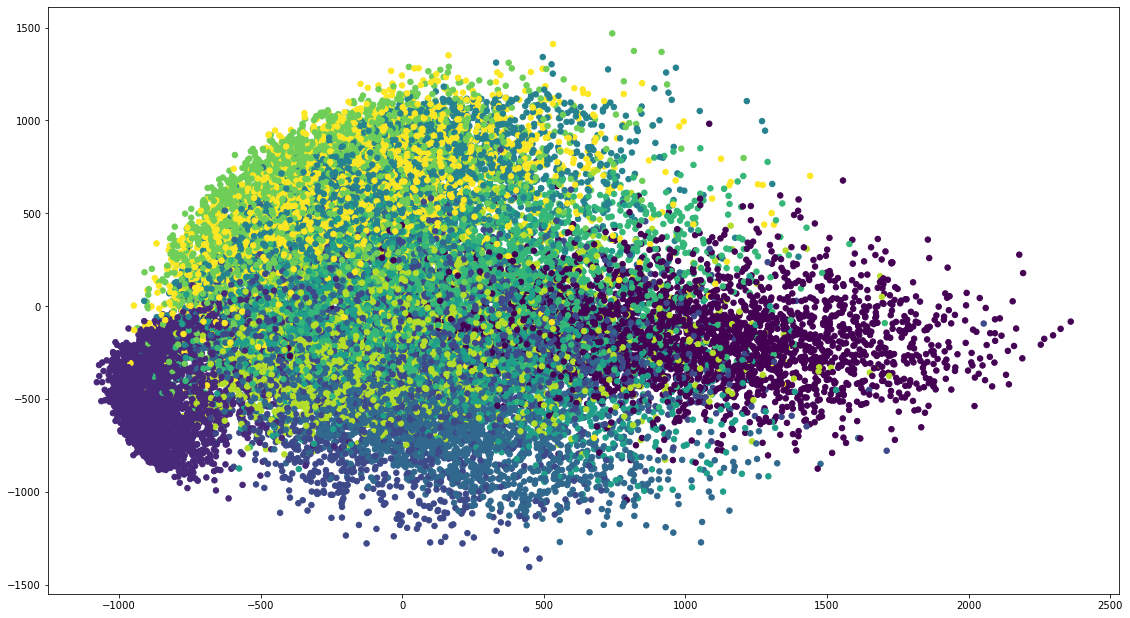

In [29]:
fig = plt.figure(figsize=(19.20,10.80))
plt.scatter(data[:,0] , data[:,1] ,s = 30, c = y_train.values.ravel())
plt.savefig('MNIST_DIGITS.png', dpi = 300)
plt.show()